In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 

# Files

In [83]:
current_dir = os.getcwd()
project_dir = os.path.abspath(os.path.join(current_dir, ".."))
DATA_PATH = f"{project_dir}/data/"

# télécharger les fichiers
customers = pd.read_csv(DATA_PATH+"olist_customers_dataset.csv")
geolocations = pd.read_csv(DATA_PATH+"olist_geolocation_dataset.csv")
items = pd.read_csv(DATA_PATH+"olist_order_items_dataset.csv")
payments = pd.read_csv(DATA_PATH+"olist_order_payments_dataset.csv")
reviews = pd.read_csv(DATA_PATH+"olist_order_reviews_dataset.csv")
orders = pd.read_csv(DATA_PATH+"olist_orders_dataset.csv")
products = pd.read_csv(DATA_PATH+"olist_products_dataset.csv")
sellers = pd.read_csv(DATA_PATH+"olist_sellers_dataset.csv")

In [3]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Orders

In [7]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [8]:
date_col = ['order_purchase_timestamp',
    'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_col:
    orders[col] = pd.to_datetime(orders[col], format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [9]:
orders.groupby(orders["order_approved_at"].dt.year)["order_id"].count()

order_approved_at
2016.0      322
2017.0    44973
2018.0    53986
Name: order_id, dtype: int64

In [10]:
month_year = orders.groupby(orders["order_approved_at"].dt.to_period('M'))["order_id"].count().reset_index()

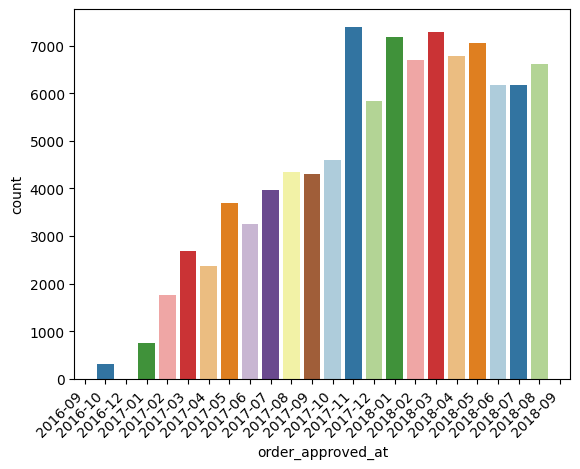

In [11]:
palette = sns.color_palette('Paired', 20)
sns.countplot(x=orders["order_approved_at"].dt.to_period('M').sort_values(), data=orders["order_id"], 
            palette=palette)
plt.xticks(rotation=45, ha="right");

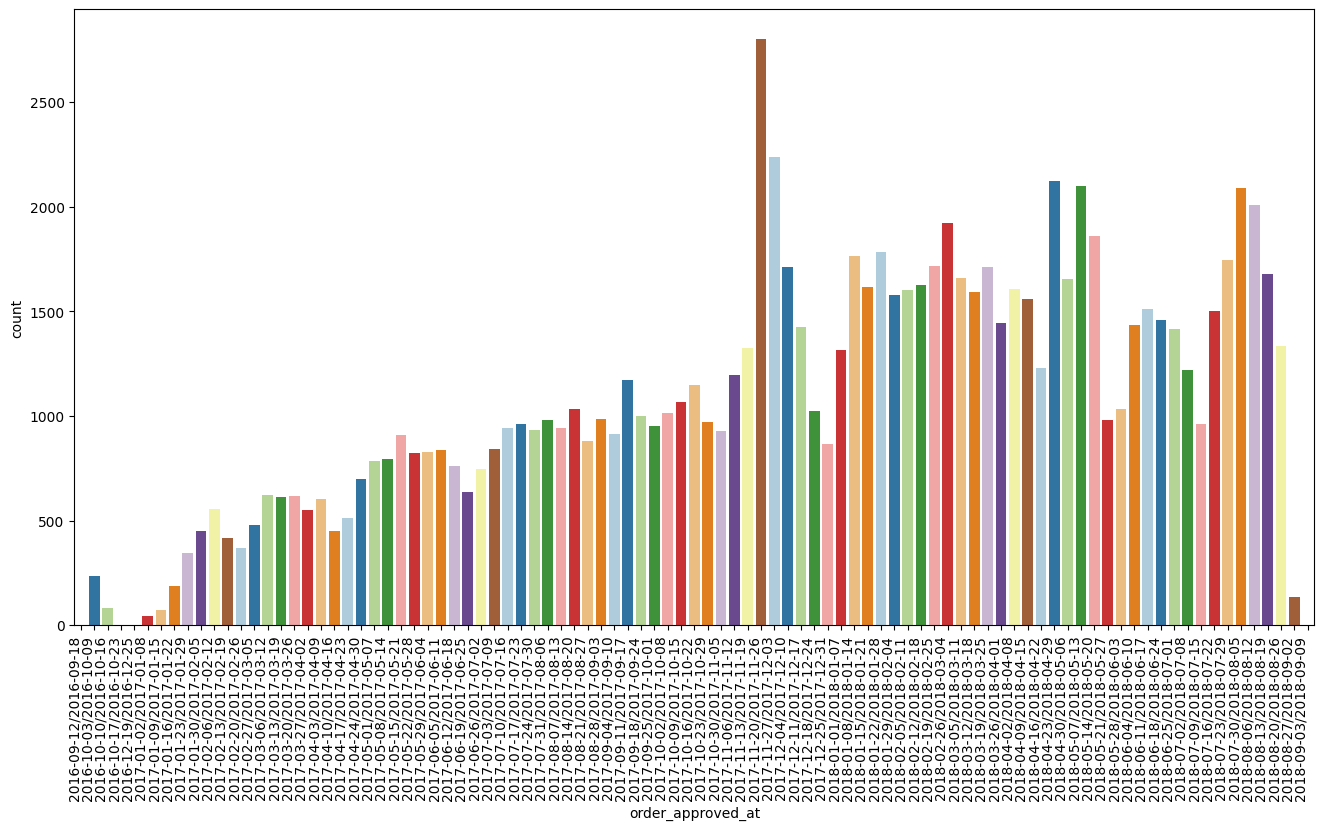

In [12]:
palette = sns.color_palette('Paired', 20)
plt.figure(figsize=(16,8))
sns.countplot(x=orders["order_approved_at"].dt.to_period('w').sort_values(), data=orders["order_id"], 
            palette=palette)
plt.xticks(rotation=90, ha="right");

In [13]:
# créer une colonne sur la durée de livraison
orders["delivery_time"] = round((orders["order_delivered_customer_date"] - orders["order_approved_at"]) / np.timedelta64(1, 'D'),2)

In [14]:
orders.isna().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
delivery_time                    0.029957
dtype: float64

In [15]:
orders.dropna(subset=["order_delivered_carrier_date","order_delivered_customer_date","order_approved_at","order_status"], inplace=True)

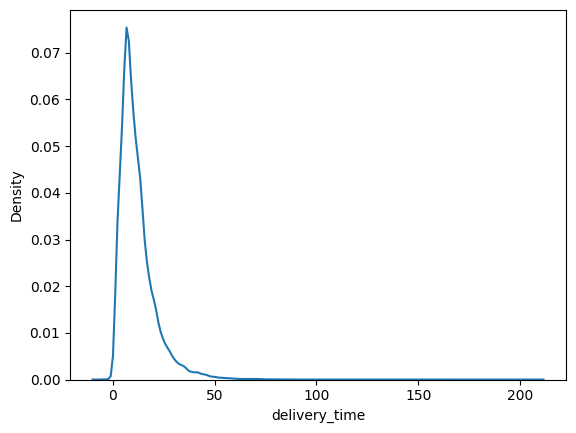

In [16]:
sns.kdeplot(data=orders, x="delivery_time");

In [17]:
orders["delivery_time"].describe()

count    96461.000000
mean        12.129953
std          9.516025
min         -6.990000
25%          6.310000
50%          9.850000
75%         15.140000
max        208.500000
Name: delivery_time, dtype: float64

In [18]:
orders = orders[~(orders["delivery_time"] <= 0)]

In [19]:
len(orders[orders["delivery_time"] > 50])/len(orders) *100

0.6690871369294605

In [20]:
orders = orders[~(orders["delivery_time"] > 50)]

In [21]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [22]:
payments.isna().mean()

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

In [23]:
payments["payment_type"].value_counts(normalize=True)

credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: payment_type, dtype: float64

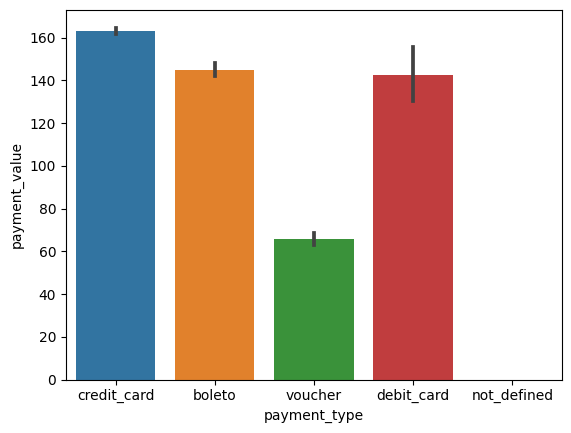

In [24]:
sns.barplot(data=payments, x="payment_type", y="payment_value");

In [25]:
orders = orders.merge(payments, on="order_id", how="left")

In [26]:
orders[orders["order_id"] == "e481f51cbdc54678b7cc49136f2d6af7"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,2,voucher,1,18.59


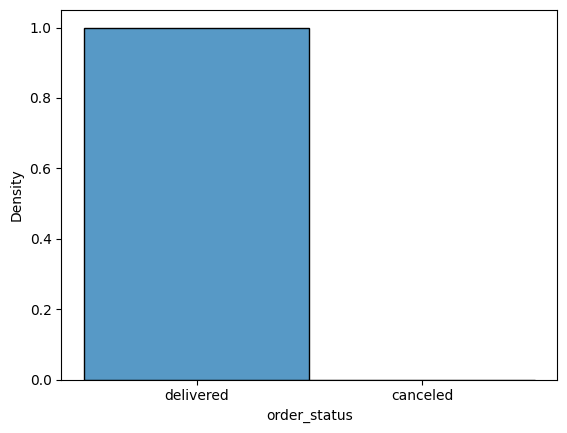

In [27]:
sns.histplot(x=orders['order_status'],data=orders['order_id'], palette=palette, stat='density', discrete=True);

In [28]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [29]:
orders = orders.merge(reviews[["order_id","review_id","review_score"]], on="order_id", how="left")

In [30]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.50,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.38,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0


In [31]:
#orders = orders.merge(items[["order_id","product_id","order_item_id","price","freight_value"]], on="order_id", how="left")

In [32]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.50,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.38,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0


In [33]:
orders_values = orders.groupby("order_id")["payment_value"].sum().reset_index()

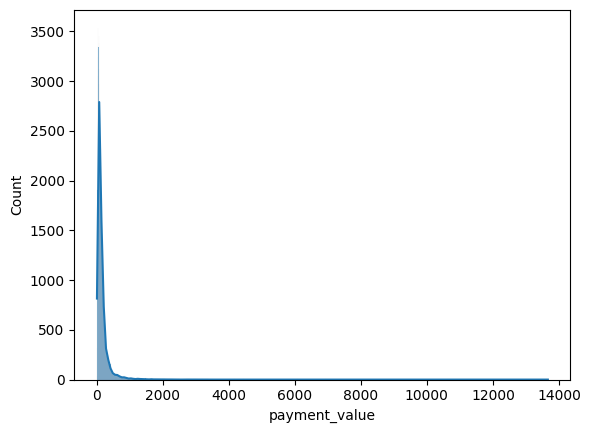

In [34]:
sns.histplot(data=orders_values, x="payment_value", kde=True);

In [35]:
orders_values['payment_value'].describe()

count    95755.000000
mean       160.303854
std        219.374773
min          9.590000
25%         62.010000
50%        105.370000
75%        176.780000
max      13664.080000
Name: payment_value, dtype: float64

In [36]:
len(orders_values[orders_values["payment_value"] > 1000])/len(orders_values)*100

1.149809409430317

In [37]:
outliers_montant = list(orders_values[orders_values["payment_value"] > 1000]["order_id"].values)

In [38]:
orders = orders[~orders["order_id"].isin(outliers_montant)]

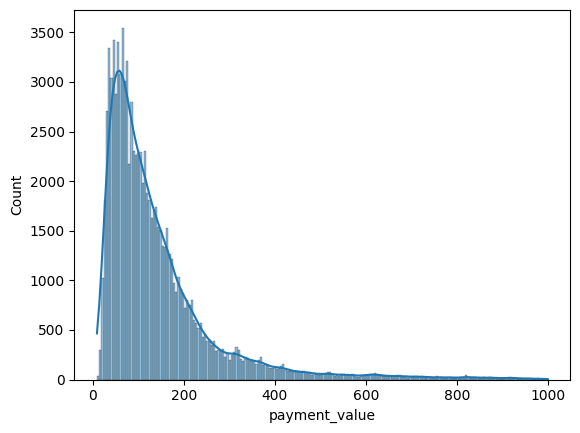

In [39]:
orders_values = orders.groupby("order_id")["payment_value"].sum().reset_index()
sns.histplot(data=orders_values, x="payment_value", kde=True);

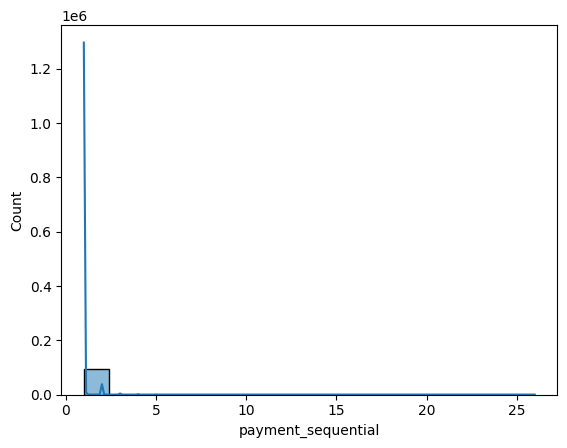

In [40]:
orders_sequencement = orders.groupby("order_id")["payment_sequential"].count().sort_values().reset_index()
sns.histplot(data=orders_sequencement, x="payment_sequential", kde=True);

In [41]:
orders_sequencement["payment_sequential"].describe()

count    94654.000000
mean         1.049750
std          0.386298
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         26.000000
Name: payment_sequential, dtype: float64

In [42]:
len(orders_sequencement[orders_sequencement["payment_sequential"] > 5])/len(orders_sequencement)*100

0.11515625330149809

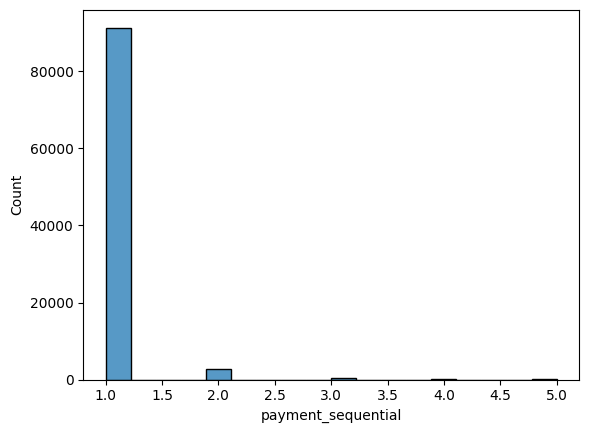

In [43]:
outliers_payments_nb = list(orders_sequencement[orders_sequencement["payment_sequential"] > 5]["order_id"].values)
orders = orders[~orders["order_id"].isin(outliers_payments_nb)]
orders_sequencement = orders.groupby("order_id")["payment_sequential"].count().sort_values().reset_index()
sns.histplot(data=orders_sequencement, x="payment_sequential");

In [44]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.43,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.50,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.38,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0


In [45]:
orders = orders[~(orders["order_status"] == "canceled")]

# Customers

In [46]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [47]:
customers_orders = customers.merge(orders, on="customer_id", how="left")

In [48]:
customers_orders = customers_orders[~(customers_orders["order_id"].isna())]

In [49]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,8.80,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,16.65,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,25.07,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,14.94,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11.45,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0


# RFM

## Recency

In [50]:
first_order = customers_orders.groupby(["customer_unique_id"])["order_purchase_timestamp"].min().reset_index()
first_order.rename(columns={"order_purchase_timestamp": "first_order"}, inplace=True)

customers_orders = customers_orders.merge(first_order, on="customer_unique_id", how="left")

In [51]:
last_date_db = customers_orders["order_purchase_timestamp"].max()
customers_orders["recency"] = (last_date_db - customers_orders["first_order"]).dt.days

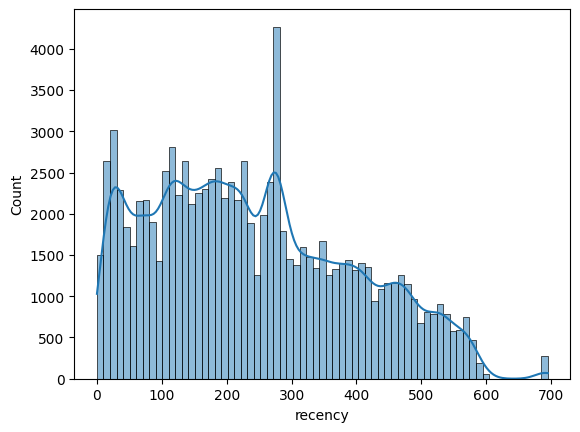

In [52]:
sns.histplot(data=customers_orders, x="recency", kde=True);

## Frequency

In [102]:
frequency = customers_orders.groupby("customer_unique_id")["order_id"].nunique().sort_values().reset_index()
frequency.rename(columns={"order_id" : "frequency"}, inplace=True)
frequency

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,a9585b76d1dc3d478b6277d7f1bf5013,1
2,a9582449371f15be7471d728544c18ac,1
3,a95637272721257c61a75e2ec767eb3f,1
4,a955e2d4e8d135afe6dd2084dd55607a,1
...,...,...
91497,1b6c7548a2a1f9037c1fd3ddfed95f33,7
91498,6469f99c1f9dfae7733b25662e7f1782,7
91499,ca77025e7201e3b30c44b472ff346268,7
91500,3e43e6105506432c953e165fb2acf44c,9


## Montant

In [86]:
montant = customers_orders.groupby("customer_unique_id")["payment_value"].sum().reset_index()
montant


,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
91497,fffbf87b7a1a6fa8b03f081c5f51a201,167.32
91498,fffea47cd6d3cc0a88bd621562a9d061,84.58
91499,ffff371b4d645b6ecea244b27531430a,112.46
91500,ffff5962728ec6157033ef9805bacc48,133.69


In [103]:
customers_rfm = customers_orders[["customer_unique_id","recency"]]
customers_rfm = customers_rfm.merge(montant, on="customer_unique_id", how="left")
customers_rfm = customers_rfm.merge(frequency, on="customer_unique_id", how="left")
customers_rfm.rename(columns={"payment_value" : "monetary"}, inplace=True)

In [104]:
customers_rfm

,customer_unique_id,recency,monetary,frequency
0,861eff4711a542e4b93843c6dd7febb0,469,146.87,1
1,290c77bc529b7ac935b93aa66c333dc3,228,335.48,1
2,060e732b5b29e8181a18229c7b0b2b5e,101,157.73,1
3,259dac757896d24d7702b9acbbff3f3c,168,173.30,1
4,345ecd01c38d18a9036ed96c73b8d066,31,252.25,1
...,...,...,...,...
98375,1a29b476fee25c95fbafc67c5ac95cf8,143,88.78,1
98376,d52a67c98be1cf6a5c84435bd38d095d,147,129.06,1
98377,e9f50caf99f032f0bf3c55141f019d99,142,56.04,1
98378,73c2643a0a458b49f58cea58833b192e,298,711.07,1


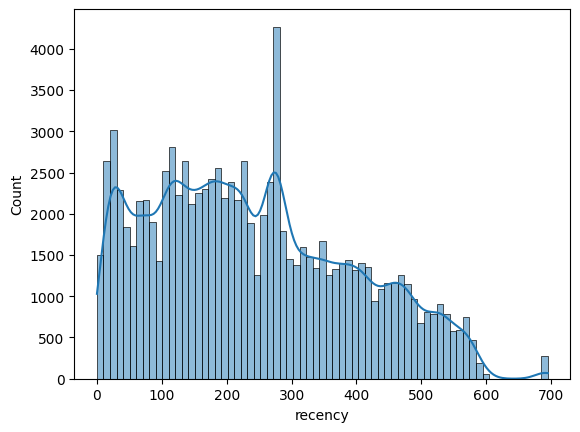

In [59]:
sns.histplot(data=customers_rfm, x="recency", kde=True);

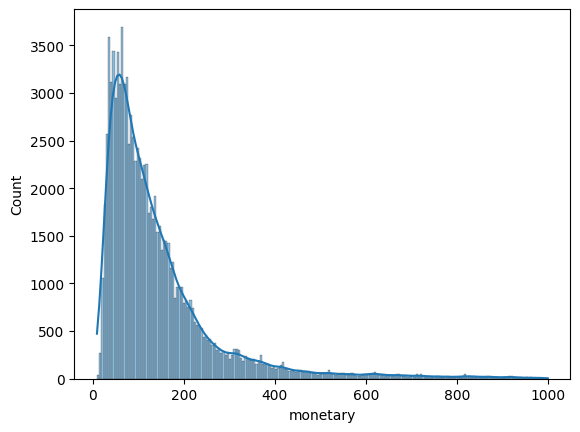

In [60]:
sns.histplot(data=customers_rfm, x="monetary", kde=True);

<AxesSubplot:xlabel='recency', ylabel='monetary'>

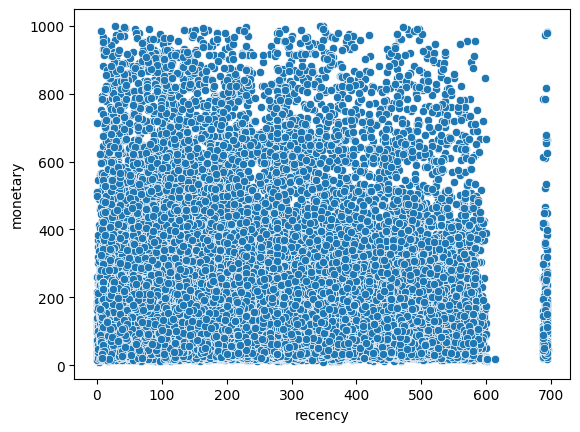

In [61]:
sns.scatterplot(x="recency", y="monetary", data=customers_rfm)

## Scoring

In [101]:
customers_rfm

,customer_unique_id,recency,monetary,order_id,monetary_score,recency_score
0,861eff4711a542e4b93843c6dd7febb0,469,146.87,1,1,4
1,290c77bc529b7ac935b93aa66c333dc3,228,335.48,1,1,2
2,060e732b5b29e8181a18229c7b0b2b5e,101,157.73,1,1,1
3,259dac757896d24d7702b9acbbff3f3c,168,173.30,1,1,2
4,345ecd01c38d18a9036ed96c73b8d066,31,252.25,1,1,1
...,...,...,...,...,...,...
98375,1a29b476fee25c95fbafc67c5ac95cf8,143,88.78,1,1,2
98376,d52a67c98be1cf6a5c84435bd38d095d,147,129.06,1,1,2
98377,e9f50caf99f032f0bf3c55141f019d99,142,56.04,1,1,2
98378,73c2643a0a458b49f58cea58833b192e,298,711.07,1,2,3


In [105]:
customers_rfm["monetary_score"] = pd.cut(customers_rfm["monetary"], bins=5, labels=False) + 1
customers_rfm["recency_score"] = pd.cut(customers_rfm["recency"], bins=5, labels=False) + 1
customers_rfm["frequency_score"] = pd.cut(customers_rfm["frequency"], bins=5, labels=False) + 1

In [107]:
customers_rfm["score_rfm"] = customers_rfm["monetary_score"] * customers_rfm["recency_score"] * customers_rfm["frequency_score"]

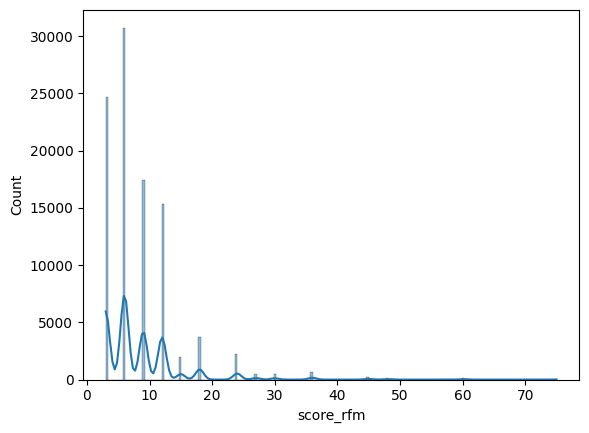

In [68]:
sns.histplot(data=customers_rfm, x="score_rfm", kde=True);

In [71]:
def create_group(x):
    if x < 10 :
        return "Très mauvais"
    elif 10 <= x <= 20:
        return "Mauvais"
    elif 20 <= x <= 40:
        return "Bon"
    elif x > 40:
        return "Très bon"

In [108]:
customers_rfm["groupe"] = customers_rfm["score_rfm"].apply(lambda x : create_group(x))

In [80]:
groupe_df = customers_rfm.groupby("groupe")["customer_id"].count().reset_index()

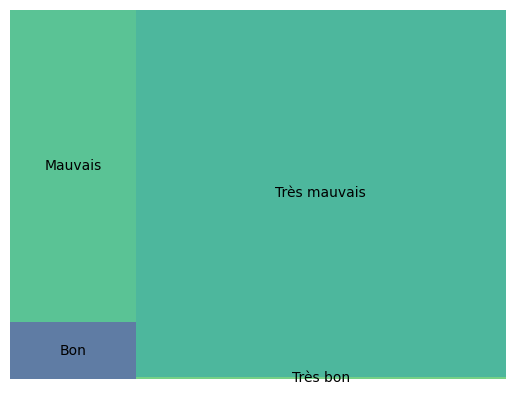

In [109]:
# plot it
import squarify 
squarify.plot(sizes=groupe_df['customer_id'], label=groupe_df['groupe'], alpha=.8 )
plt.axis('off')
plt.show()